# Classification of Text with a Fully Connected Neural Network

In [2]:
import keras

# Classifying newswires: a multi-class classification


## The Reuters dataset



In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
#train_data = train_data[:7982]

In [5]:
len(train_data)

8982

In [6]:
#test_data = test_data[:1000]

In [7]:
len(test_data)

2246

As with the IMDB reviews, each example is a list of integers (word indices):

In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45: a topic index.

In [11]:
train_labels[10]

3

## Preparing the data



In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building our network



In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach


In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 2.7243 - accuracy: 0.4835 - val_loss: 1.8752 - val_accuracy: 0.5980
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5770 - accuracy: 0.6706 - val_loss: 1.3936 - val_accuracy: 0.6760
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1876 - accuracy: 0.7440 - val_loss: 1.1892 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9614 - accuracy: 0.7905 - val_loss: 1.0754 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7999 - accuracy: 0.8280 - val_loss: 0.9999 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6610 - accuracy: 0.8623 - val_loss: 0.9633 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5515 - accuracy: 0.8864 - val_loss: 0.9185 - val_accuracy: 0.8000
Epoch 8/20
16

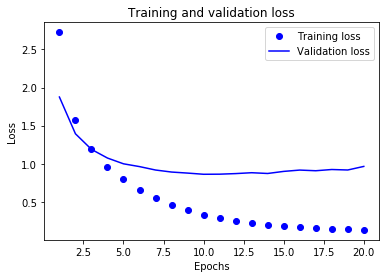

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 35ms/step - loss: 2.7596 - accuracy: 0.5147 - val_loss: 1.8348 - val_accuracy: 0.6240
Epoch 2/8
16/16 [==============================] - 0s 20ms/step - loss: 1.5170 - accuracy: 0.6814 - val_loss: 1.3650 - val_accuracy: 0.6800
Epoch 3/8
16/16 [==============================] - 0s 20ms/step - loss: 1.1475 - accuracy: 0.7473 - val_loss: 1.1911 - val_accuracy: 0.7410
Epoch 4/8
16/16 [==============================] - 0s 20ms/step - loss: 0.9384 - accuracy: 0.7969 - val_loss: 1.0554 - val_accuracy: 0.7770
Epoch 5/8
16/16 [==============================] - 0s 18ms/step - loss: 0.7775 - accuracy: 0.8327 - val_loss: 0.9931 - val_accuracy: 0.7910
Epoch 6/8
16/16 [==============================] - 0s 19ms/step - loss: 0.6516 - accuracy: 0.8624 - val_loss: 0.9338 - val_accuracy: 0.7990
Epoch 7/8
16/16 [==============================] - 0s 18ms/step - loss: 0.5436 - accuracy: 0.8869 - val_loss: 0.9009 - val_accuracy: 0.8140
Epoch 8/8
71/71 [===

In [22]:
results

[0.967138946056366, 0.7756010890007019]

In [23]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1892252894033838

## Generating predictions on new data



In [24]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

1.0

In [27]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss



In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

## On the importance of having sufficiently large intermediate layers



In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 3.0258 - accuracy: 0.3423 - val_loss: 2.1935 - val_accuracy: 0.6090
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.7766 - accuracy: 0.6232 - val_loss: 1.5944 - val_accuracy: 0.6340
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.4174 - accuracy: 0.6639 - val_loss: 1.4520 - val_accuracy: 0.6670
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2544 - accuracy: 0.6931 - val_loss: 1.3731 - val_accuracy: 0.6670
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1405 - accuracy: 0.7121 - val_loss: 1.3262 - val_accuracy: 0.6740
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0476 - accuracy: 0.7270 - val_loss: 1.3088 - val_accuracy: 0.6650
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9652 - accuracy: 0.7415 - val_loss: 1.2716 - val_accuracy: 0.6860
Epoch 8/20
63/63 [=